# 卒論研究２

## モジュールの読み込み

In [1]:
#
# 必要なモジュールの読み込み
#

import pandas as pd
import numpy as np

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.vector_ar.svar_model import SVAR

from graphviz import Digraph

import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
plt.style.use('ggplot') #グラフのスタイル
plt.rcParams['figure.figsize'] = [12, 9] # グラフサイズ設定
plt.rcParams['font.size'] = 14 #フォントサイズ
import japanize_matplotlib
import datetime
import calendar
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import random

## 原系列

### データの加工

In [2]:
df_ = pd.read_csv('卒論データ2.csv')

In [3]:
df_.head(10)

,Date_TOPIX,TOPIX,Date_S&P500,S&P500,Date_VI,VI,Date_Ex,Ex,Date_JGB,JGB
0,38077.0,1179.23,38077,1126.21,38077.0,24.70,38077.0,105.63,38077.0,1.434
1,38078.0,1175.01,38078,1132.17,38078.0,24.04,38078.0,104.07,38078.0,1.414
2,38079.0,1184.20,38079,1141.81,38079.0,22.33,38079.0,103.95,38079.0,1.424
3,38082.0,1199.24,38082,1150.57,38082.0,22.47,38082.0,104.46,38082.0,1.486
4,38083.0,1209.44,38083,1148.16,38083.0,21.45,38083.0,105.63,38083.0,1.518
5,38084.0,1204.81,38084,1140.53,38084.0,21.54,38084.0,106.00,38084.0,1.487
6,38085.0,1209.89,38085,1139.32,38085.0,21.14,38085.0,105.63,38085.0,1.487
7,38086.0,1190.86,38089,1145.20,38086.0,22.05,38086.0,106.58,38086.0,1.481
8,38089.0,1206.57,38090,1129.44,38089.0,22.07,38089.0,106.42,38089.0,1.522
9,38090.0,1216.60,38091,1128.17,38090.0,21.31,38090.0,105.25,38090.0,1.483


In [4]:
df_.tail(10)

,Date_TOPIX,TOPIX,Date_S&P500,S&P500,Date_VI,VI,Date_Ex,Ex,Date_JGB,JGB
4942,NaN,NaN,45246,4508.24,NaN,NaN,NaN,NaN,NaN,NaN
4943,NaN,NaN,45247,4514.02,NaN,NaN,NaN,NaN,NaN,NaN
4944,NaN,NaN,45250,4547.38,NaN,NaN,NaN,NaN,NaN,NaN
4945,NaN,NaN,45251,4538.19,NaN,NaN,NaN,NaN,NaN,NaN
4946,NaN,NaN,45252,4556.62,NaN,NaN,NaN,NaN,NaN,NaN
4947,NaN,NaN,45254,4559.34,NaN,NaN,NaN,NaN,NaN,NaN
4948,NaN,NaN,45257,4550.43,NaN,NaN,NaN,NaN,NaN,NaN
4949,NaN,NaN,45258,4554.89,NaN,NaN,NaN,NaN,NaN,NaN
4950,NaN,NaN,45259,4550.58,NaN,NaN,NaN,NaN,NaN,NaN
4951,NaN,NaN,45260,4567.80,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
D = []
T = []
S = []
V = []
E = []
G = []

for d in range(38077,45261):
   
    cond1 = (d in df_['Date_TOPIX'].values)
    cond2 = (d in df_['Date_S&P500'].values)
    cond3 = (d in df_['Date_VI'].values)
    cond4 = (d in df_['Date_Ex'].values)
    cond5 = (d in df_['Date_JGB'].values)
    
    if (cond1 & cond2 & cond3 & cond4 & cond5):
        D.append(d)
        cond_TOPIX = (df_['Date_TOPIX'] == d)
        t = df_.loc[cond_TOPIX,'TOPIX'].iloc[-1]
        T.append(t)
        cond_SP500 = (df_['Date_S&P500'] == d)
        s = df_.loc[cond_SP500,'S&P500'].iloc[-1]
        S.append(s)
        cond_VI = (df_['Date_VI'] == d)
        v = df_.loc[cond_VI,'VI'].iloc[-1]
        V.append(v)
        cond_Ex= (df_['Date_Ex'] == d)
        e = df_.loc[cond_Ex,'Ex'].iloc[-1]
        E.append(e)
        cond_JGB = (df_['Date_JGB'] == d)
        g = df_.loc[cond_JGB,'JGB'].iloc[-1]
        G.append(g)
    
    else:
        pass

df = pd.DataFrame({'Date':D, 'TOPIX':T, 'S&P500':S, 'VI':V, 'Ex':E, 'JGB':G})
df

,Date,TOPIX,S&P500,VI,Ex,JGB
0,38077,1179.23,1126.21,24.70,105.63,1.434
1,38078,1175.01,1132.17,24.04,104.07,1.414
2,38079,1184.20,1141.81,22.33,103.95,1.424
3,38082,1199.24,1150.57,22.47,104.46,1.486
4,38083,1209.44,1148.16,21.45,105.63,1.518
...,...,...,...,...,...,...
4652,45254,2390.94,4559.34,16.87,149.64,0.786
4653,45257,2381.76,4550.43,17.36,149.53,0.787
4654,45258,2376.71,4554.89,16.13,148.14,0.768
4655,45259,2364.50,4550.58,17.05,146.87,0.695


In [6]:
df.head(10)

,Date,TOPIX,S&P500,VI,Ex,JGB
0,38077,1179.23,1126.21,24.70,105.63,1.434
1,38078,1175.01,1132.17,24.04,104.07,1.414
2,38079,1184.20,1141.81,22.33,103.95,1.424
3,38082,1199.24,1150.57,22.47,104.46,1.486
4,38083,1209.44,1148.16,21.45,105.63,1.518
5,38084,1204.81,1140.53,21.54,106.00,1.487
6,38085,1209.89,1139.32,21.14,105.63,1.487
7,38089,1206.57,1145.20,22.07,106.42,1.522
8,38090,1216.60,1129.44,21.31,105.25,1.483
9,38091,1217.87,1128.17,21.24,106.86,1.541


In [7]:
df.tail(10)

,Date,TOPIX,S&P500,VI,Ex,JGB
4647,45246,2368.62,4508.24,18.75,151.34,0.798
4648,45247,2391.05,4514.02,18.28,150.77,0.765
4649,45250,2372.60,4547.38,18.58,149.95,0.756
4650,45251,2367.79,4538.19,17.87,148.19,0.712
4651,45252,2378.19,4556.62,17.37,148.30,0.742
4652,45254,2390.94,4559.34,16.87,149.64,0.786
4653,45257,2381.76,4550.43,17.36,149.53,0.787
4654,45258,2376.71,4554.89,16.13,148.14,0.768
4655,45259,2364.50,4550.58,17.05,146.87,0.695
4656,45260,2374.93,4567.80,16.57,147.09,0.691


In [8]:
df['Date'] = pd.to_timedelta(df['Date'],unit='D')+pd.to_datetime("1899/12/30")
df

,Date,TOPIX,S&P500,VI,Ex,JGB
0,2004-03-31,1179.23,1126.21,24.70,105.63,1.434
1,2004-04-01,1175.01,1132.17,24.04,104.07,1.414
2,2004-04-02,1184.20,1141.81,22.33,103.95,1.424
3,2004-04-05,1199.24,1150.57,22.47,104.46,1.486
4,2004-04-06,1209.44,1148.16,21.45,105.63,1.518
...,...,...,...,...,...,...
4652,2023-11-24,2390.94,4559.34,16.87,149.64,0.786
4653,2023-11-27,2381.76,4550.43,17.36,149.53,0.787
4654,2023-11-28,2376.71,4554.89,16.13,148.14,0.768
4655,2023-11-29,2364.50,4550.58,17.05,146.87,0.695


In [9]:
df.set_index('Date', drop = True, inplace = True)
df

,TOPIX,S&P500,VI,Ex,JGB
Date,,,,,
2004-03-31,1179.23,1126.21,24.70,105.63,1.434
2004-04-01,1175.01,1132.17,24.04,104.07,1.414
2004-04-02,1184.20,1141.81,22.33,103.95,1.424
2004-04-05,1199.24,1150.57,22.47,104.46,1.486
2004-04-06,1209.44,1148.16,21.45,105.63,1.518
...,...,...,...,...,...
2023-11-24,2390.94,4559.34,16.87,149.64,0.786
2023-11-27,2381.76,4550.43,17.36,149.53,0.787
2023-11-28,2376.71,4554.89,16.13,148.14,0.768


In [10]:
df = df.reindex(columns = ['TOPIX', 'S&P500', 'Ex', 'JGB', 'VI'])
df

,TOPIX,S&P500,Ex,JGB,VI
Date,,,,,
2004-03-31,1179.23,1126.21,105.63,1.434,24.70
2004-04-01,1175.01,1132.17,104.07,1.414,24.04
2004-04-02,1184.20,1141.81,103.95,1.424,22.33
2004-04-05,1199.24,1150.57,104.46,1.486,22.47
2004-04-06,1209.44,1148.16,105.63,1.518,21.45
...,...,...,...,...,...
2023-11-24,2390.94,4559.34,149.64,0.786,16.87
2023-11-27,2381.76,4550.43,149.53,0.787,17.36
2023-11-28,2376.71,4554.89,148.14,0.768,16.13


### 基本統計量

In [11]:
df.shape

(4657, 5)

In [12]:
df.describe()

,TOPIX,S&P500,Ex,JGB,VI
count,4657.000000,4657.000000,4657.000000,4657.000000,4657.000000
mean,1405.744958,2140.020500,107.417846,0.736079,23.477307
std,402.294965,1076.784557,15.315623,0.637984,8.753823
min,695.510000,676.530000,75.760000,-0.297000,11.720000
25%,1116.340000,1274.540000,99.710000,0.079000,18.110000
50%,1459.490000,1830.610000,108.870000,0.642000,21.360000
75%,1694.790000,2792.810000,115.080000,1.342000,26.190000
max,2430.300000,4793.540000,151.770000,1.996000,91.450000


### 可視化

In [13]:
plt.rcParams['figure.figsize'] = [12, 9] 

In [14]:
def plot_1(df, title):
    
    fig = plt.figure()
    axes = fig.add_subplot()
    
    axes.plot(df, color = 'k')
    axes.set_title(title, size= 30)
    axes.axvline(datetime.datetime(2008,9,15), color="b")
    axes.axvline(datetime.datetime(2020,2,20), color="c")
    axes.axvline(datetime.datetime(2022,2,20), color="g")
    
    axes.text(0.2, 0.01, "リーマン", transform = axes.transAxes, color = 'b')
    axes.text(0.7, 0.01, "コロナ", transform = axes.transAxes, color = 'c')
    axes.text(0.9, 0.01, "ウクライナ", transform = axes.transAxes, color = 'g')

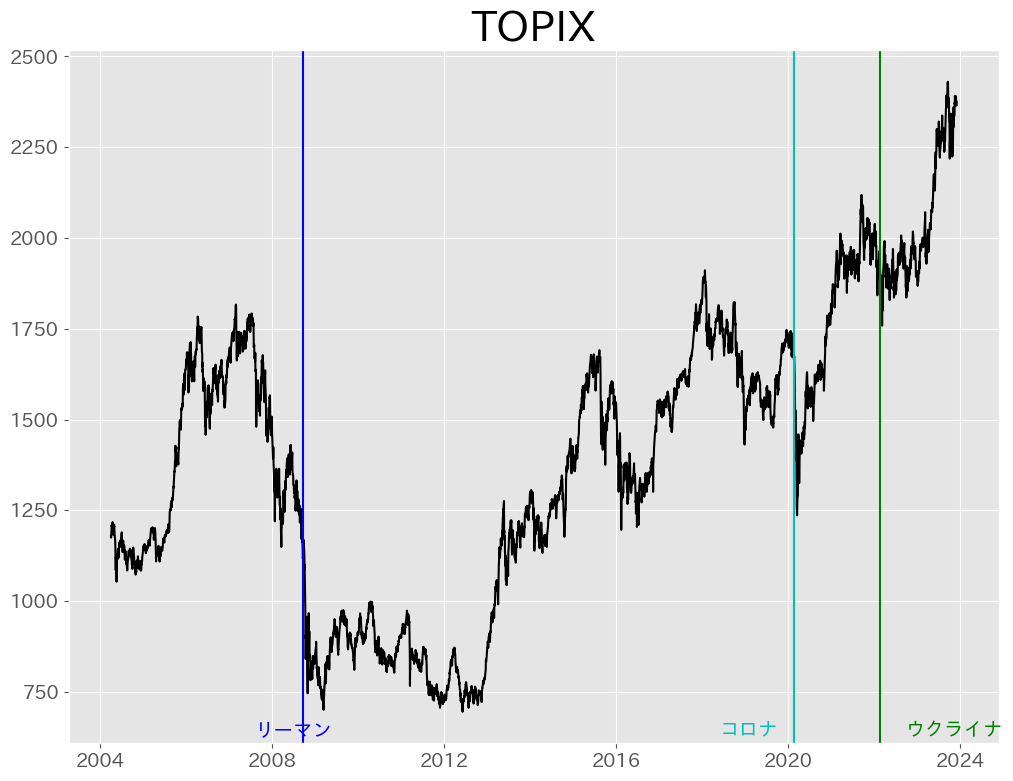

In [15]:
plot_1(df['TOPIX'],'TOPIX')

In [16]:
plt.rcParams['figure.figsize'] = [12, 4] 

In [17]:
def plot_2(df):
    
    """2列のdataframe型を読み込んで1×2のグラフにプロット"""
    
    fig, axes = plt.subplots(1, 2)
    
    for l in range(2):
        axes[l].plot(df.iloc[:,l], color = 'k')
        axes[l].set_title(df.columns.values[l])
        axes[l].axvline(datetime.datetime(2008,9,15), color="b")
        axes[l].axvline(datetime.datetime(2020,2,20), color="c")
        axes[l].axvline(datetime.datetime(2022,2,20), color="g")
        
    axes[0].text(0.2, 0.01, "リーマン", transform = axes[0].transAxes, color = 'b')
    axes[0].text(0.7, 0.01, "コロナ", transform = axes[0].transAxes, color = 'c')
    axes[0].text(0.8, 0.01, "ウクライナ", transform = axes[0].transAxes, color = 'g')

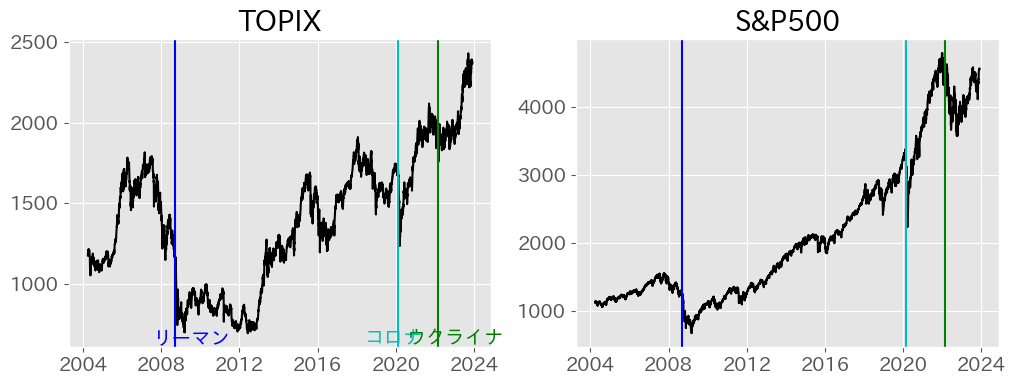

In [18]:
plot_2(df.iloc[:,0:2])

In [19]:
plt.rcParams['figure.figsize'] = [12, 9] 

In [20]:
def plot_4(df):
    
    """4列のdataframe型を読み込んで2×2のグラフにプロット"""
    
    fig, axes = plt.subplots(2, 2)
    
    t1 = (0, 0, 1, 1)
    t2 = (0, 1, 0, 1)
    
    for l, m, n in zip(t1, t2, range(4)):
        axes[l, m].plot(df.iloc[:,n], color = 'k')
        axes[l, m].set_title(df.columns.values[n])
        axes[l, m].axvline(datetime.datetime(2008,9,15), color="b")
        axes[l, m].axvline(datetime.datetime(2020,2,20), color="c")
        axes[l, m].axvline(datetime.datetime(2022,2,20), color="g")
        
    axes[0, 0].text(0.2, 0.01, "リーマン", transform = axes[0, 0].transAxes, color = 'b')
    axes[0, 0].text(0.7, 0.01, "コロナ", transform = axes[0, 0].transAxes, color = 'c')
    axes[0, 0].text(0.8, 0.01, "ウクライナ", transform = axes[0, 0].transAxes, color = 'g')

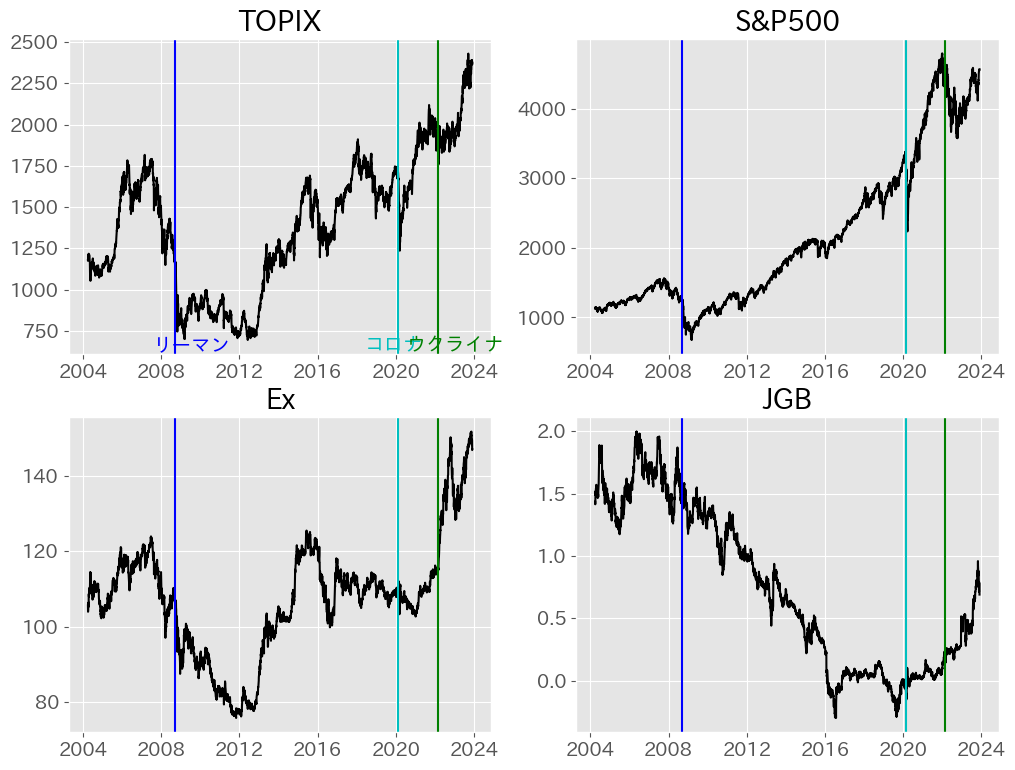

In [21]:
plot_4(df.iloc[:,0:4])

In [22]:
#df_scatter = sns.pairplot(df) # 散布図行列

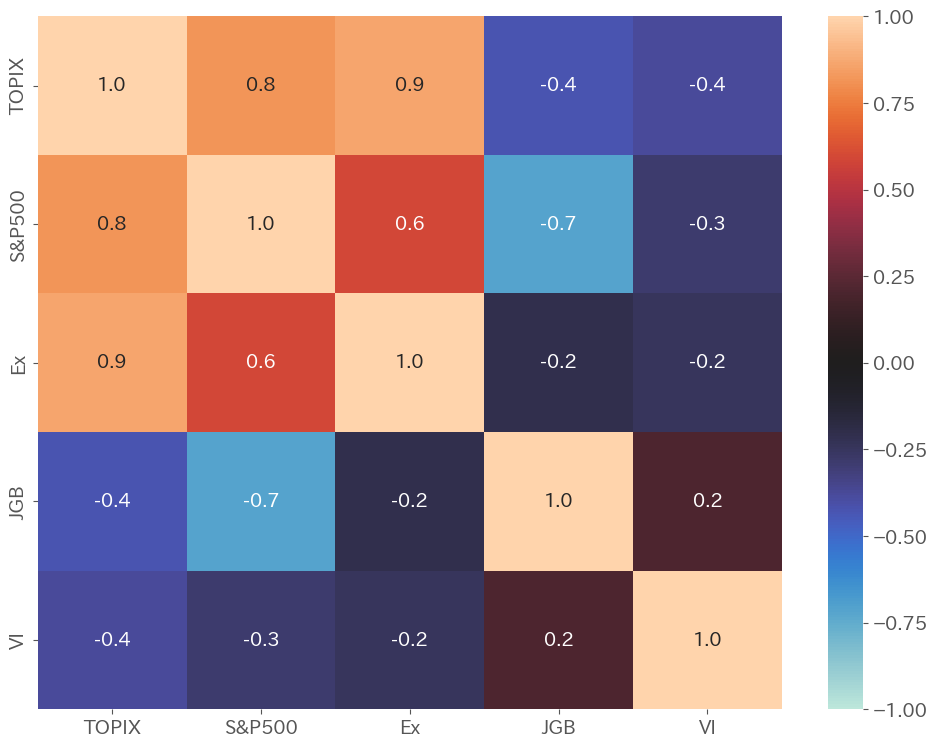

In [23]:
corr_mat = df.corr(method='pearson')
# method='spearman'でスピアマン、'kendall'でケンドールも指定可能
sns.heatmap(corr_mat,
            vmin=-1.0,
            vmax=1.0,
            center=0,
            annot=True, # True:格子の中に値を表示
            fmt='.1f',
            xticklabels=corr_mat.columns.values,
            yticklabels=corr_mat.columns.values
           )
plt.show()

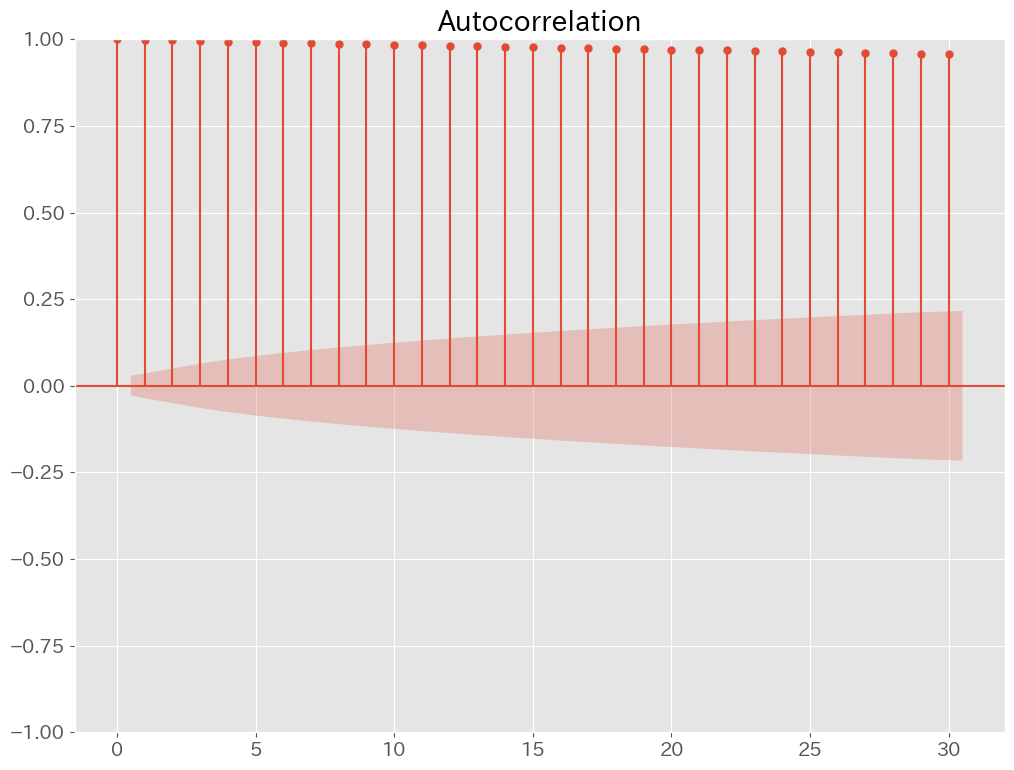

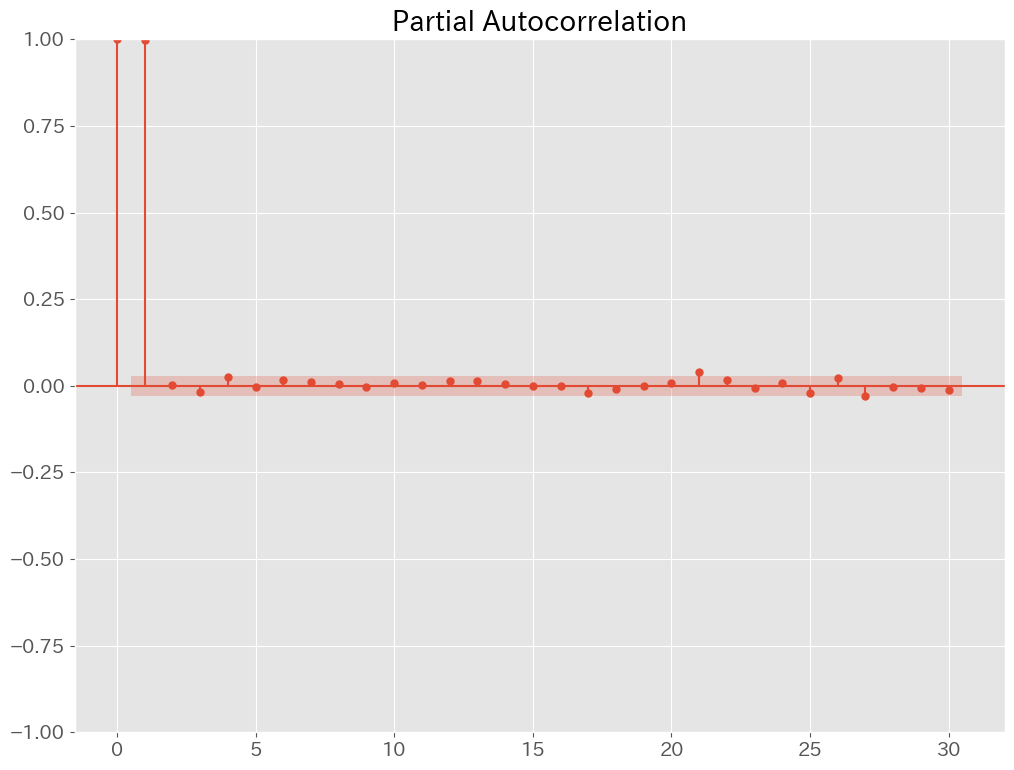

In [24]:
#
# 原系列の自己相関
#

acf = plot_acf(df['TOPIX'], lags=30)   #自己相関
pacf = plot_pacf(df['TOPIX'], lags=30) #偏自己相関

## 定常系列へと処理

### 単位根検定

In [25]:
#
# Augmented Dickey-Fuller 単位根検定
#   帰無仮説：単位根がある
#   対立仮説：定数項＋定常過程
#

def ADF_c(df):
    
    for i in range(len(df.columns)):

        #Augmented Dickey-Fuller 単位根検定
        c_results = adfuller(df.iloc[:,i],regression='c')  

        #p値出力
        print(df.columns[i],'\t',c_results[1]) 

In [26]:
#
# Augmented Dickey-Fuller 単位根検定
#   帰無仮説：単位根がある
#   対立仮説：定数項 ＋ 線形トレンド ＋ 定常過程
#

def ADF_ct(df):

    for i in range(len(df.columns)):
    
        #Augmented Dickey-Fuller 単位根検定
        c_results = adfuller(df.iloc[:,i],regression='ct')  
    
        #p値出力
        print(df.columns[i],'\t',c_results[1]) 

In [27]:
#
# Augmented Dickey-Fuller 単位根検定
#   帰無仮説：単位根がある
#   対立仮説：定数項 ＋ 線形トレンド ＋ 非線形トレンド ＋ 定常過程
#

def ADF_ctt(df):

    for i in range(len(df.columns)):
    
        #Augmented Dickey-Fuller 単位根検定
        c_results = adfuller(df.iloc[:,i],regression='ctt')  
    
        #p値出力
        print(df.columns[i],'\t',c_results[1]) 

In [28]:
df

,TOPIX,S&P500,Ex,JGB,VI
Date,,,,,
2004-03-31,1179.23,1126.21,105.63,1.434,24.70
2004-04-01,1175.01,1132.17,104.07,1.414,24.04
2004-04-02,1184.20,1141.81,103.95,1.424,22.33
2004-04-05,1199.24,1150.57,104.46,1.486,22.47
2004-04-06,1209.44,1148.16,105.63,1.518,21.45
...,...,...,...,...,...
2023-11-24,2390.94,4559.34,149.64,0.786,16.87
2023-11-27,2381.76,4550.43,149.53,0.787,17.36
2023-11-28,2376.71,4554.89,148.14,0.768,16.13


In [29]:
df_log = np.log(df[['TOPIX','S&P500','Ex']])
df_log

,TOPIX,S&P500,Ex
Date,,,
2004-03-31,7.072617,7.026613,4.659942
2004-04-01,7.069032,7.031891,4.645064
2004-04-02,7.076823,7.040370,4.643910
2004-04-05,7.089443,7.048013,4.648804
2004-04-06,7.097913,7.045916,4.659942
...,...,...,...
2023-11-24,7.779442,8.424933,5.008232
2023-11-27,7.775595,8.422977,5.007497
2023-11-28,7.773472,8.423957,4.998158


In [30]:
df_original = pd.merge(df_log, df.iloc[:,-2:], how = 'inner', on = 'Date')
df_original

,TOPIX,S&P500,Ex,JGB,VI
Date,,,,,
2004-03-31,7.072617,7.026613,4.659942,1.434,24.70
2004-04-01,7.069032,7.031891,4.645064,1.414,24.04
2004-04-02,7.076823,7.040370,4.643910,1.424,22.33
2004-04-05,7.089443,7.048013,4.648804,1.486,22.47
2004-04-06,7.097913,7.045916,4.659942,1.518,21.45
...,...,...,...,...,...
2023-11-24,7.779442,8.424933,5.008232,0.786,16.87
2023-11-27,7.775595,8.422977,5.007497,0.787,17.36
2023-11-28,7.773472,8.423957,4.998158,0.768,16.13


In [31]:
ADF_c(df_original)

TOPIX 	 0.7987452086264011
S&P500 	 0.9569718393272355
Ex 	 0.888682837521635
JGB 	 0.56699132364815
VI 	 7.695936058979785e-06


In [32]:
ADF_ct(df_original)

TOPIX 	 0.7706070733982147
S&P500 	 0.5001601431886888
Ex 	 0.934231079142934
JGB 	 0.8821047120265435
VI 	 4.734059875241496e-05


In [33]:
ADF_ctt(df_original)

TOPIX 	 0.7282517544785188
S&P500 	 0.5146516070048851
Ex 	 0.7921747561841495
JGB 	 0.5588826898976773
VI 	 0.00013852837139504011


### 変換

In [34]:
df_diff = df_original[['TOPIX','S&P500','Ex','JGB']].diff().dropna()
df_diff

,TOPIX,S&P500,Ex,JGB
Date,,,,
2004-04-01,-0.003585,0.005278,-0.014879,-0.020
2004-04-02,0.007791,0.008479,-0.001154,0.010
2004-04-05,0.012621,0.007643,0.004894,0.062
2004-04-06,0.008469,-0.002097,0.011138,0.032
2004-04-07,-0.003836,-0.006668,0.003497,-0.031
...,...,...,...,...
2023-11-24,0.005347,0.000597,0.008995,0.044
2023-11-27,-0.003847,-0.001956,-0.000735,0.001
2023-11-28,-0.002123,0.000980,-0.009339,-0.019


In [35]:
df_changed = pd.merge(df_diff, df_original.loc['2004-04-01':, ['VI']], how = 'inner', on = 'Date')
df_changed#.to_csv("df_changed.csv")

,TOPIX,S&P500,Ex,JGB,VI
Date,,,,,
2004-04-01,-0.003585,0.005278,-0.014879,-0.020,24.04
2004-04-02,0.007791,0.008479,-0.001154,0.010,22.33
2004-04-05,0.012621,0.007643,0.004894,0.062,22.47
2004-04-06,0.008469,-0.002097,0.011138,0.032,21.45
2004-04-07,-0.003836,-0.006668,0.003497,-0.031,21.54
...,...,...,...,...,...
2023-11-24,0.005347,0.000597,0.008995,0.044,16.87
2023-11-27,-0.003847,-0.001956,-0.000735,0.001,17.36
2023-11-28,-0.002123,0.000980,-0.009339,-0.019,16.13


In [36]:
ADF_c(df_changed)

TOPIX 	 0.0
S&P500 	 8.90113576784521e-30
Ex 	 0.0
JGB 	 0.0
VI 	 7.887893210118334e-06


In [37]:
ADF_ct(df_changed)

TOPIX 	 0.0
S&P500 	 0.0
Ex 	 0.0
JGB 	 0.0
VI 	 4.7446172588442614e-05


In [38]:
ADF_ctt(df_changed)

TOPIX 	 0.0
S&P500 	 7.224436119868984e-25
Ex 	 0.0
JGB 	 0.0
VI 	 0.00014266176910122106


### 基本統計量

In [39]:
df_changed.describe()#.to_csv("基本統計量(df_changed).csv")

,TOPIX,S&P500,Ex,JGB,VI
count,4656.000000,4656.000000,4656.000000,4656.000000,4656.000000
mean,0.000150,0.000301,0.000071,-0.000160,23.477045
std,0.013389,0.012440,0.006420,0.021053,8.754745
min,-0.100071,-0.127652,-0.048316,-0.125000,11.720000
25%,-0.006532,-0.004198,-0.003295,-0.010000,18.110000
50%,0.000483,0.000734,0.000184,0.000000,21.360000
75%,0.007250,0.005796,0.003482,0.010000,26.190000
max,0.128646,0.104236,0.048428,0.150000,91.450000


In [40]:
plt.rcParams['figure.figsize'] = [12, 9]

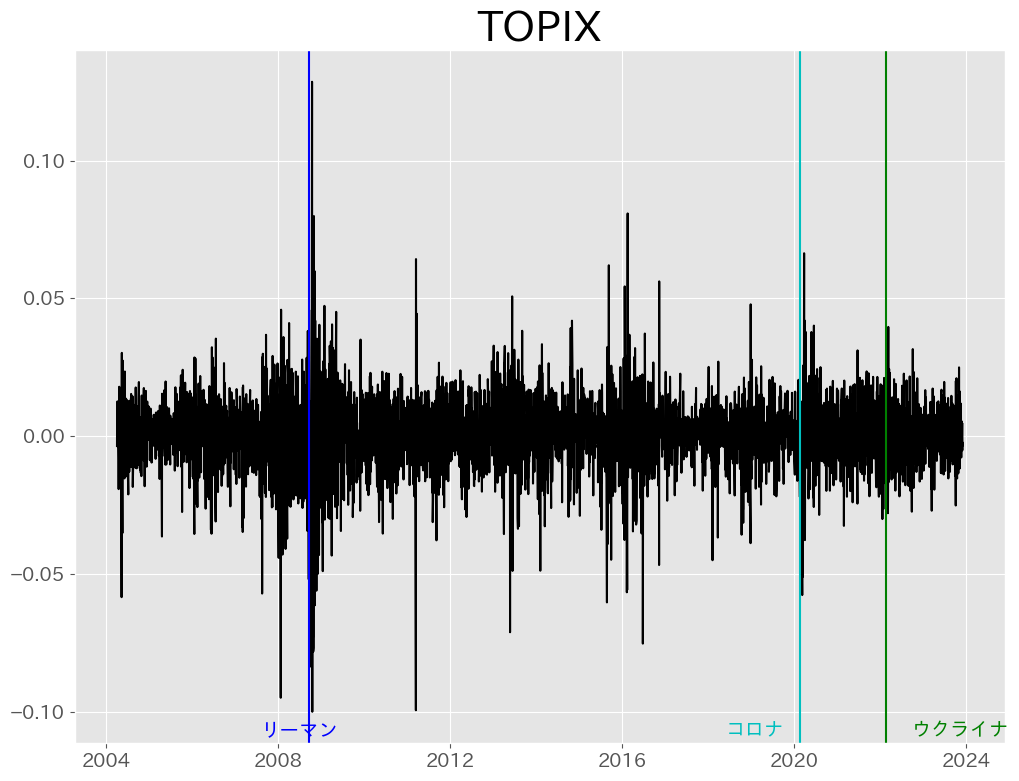

In [41]:
plot_1(df_changed['TOPIX'],'TOPIX')

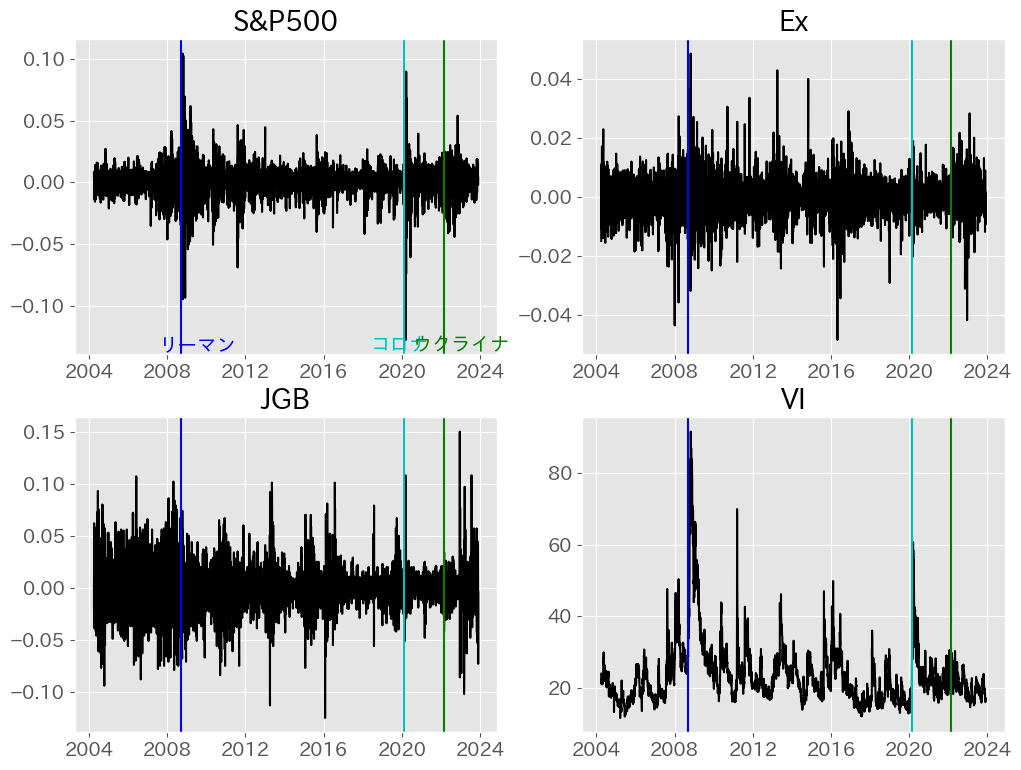

In [42]:
plot_4(df_changed.iloc[:,1:5])

In [43]:
#df_scatter = sns.pairplot(df_changed) # 散布図行列

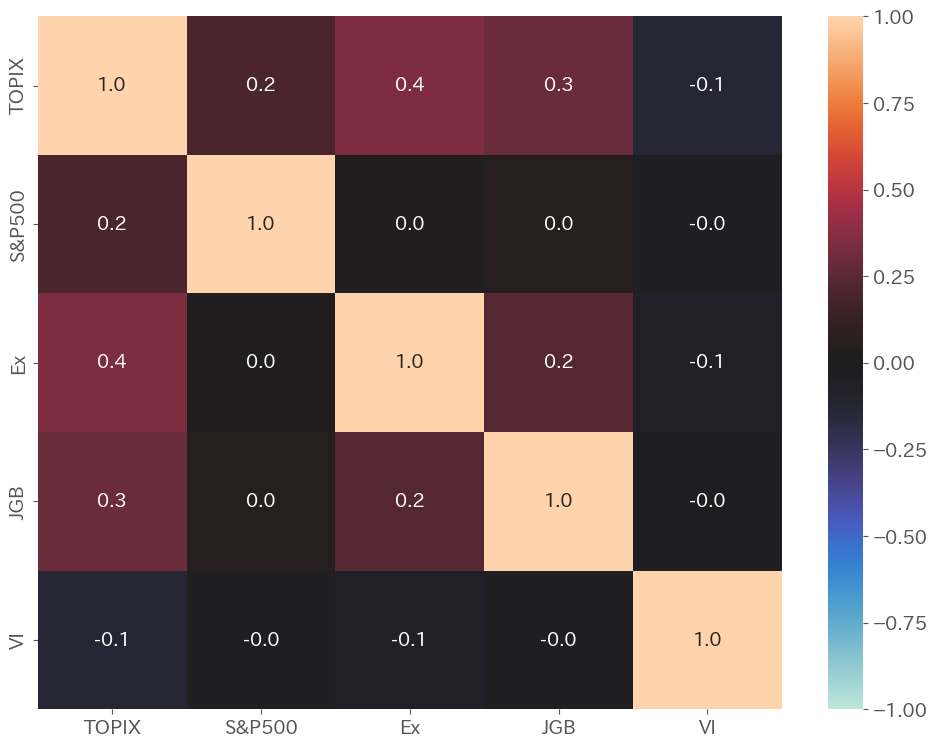

In [44]:
corr_mat = df_changed.corr(method='pearson')
# method='spearman'でスピアマン、'kendall'でケンドールも指定可能
sns.heatmap(corr_mat,
            vmin=-1.0,
            vmax=1.0,
            center=0,
            annot=True, # True:格子の中に値を表示
            fmt='.1f',
            xticklabels=corr_mat.columns.values,
            yticklabels=corr_mat.columns.values
           )
plt.show()

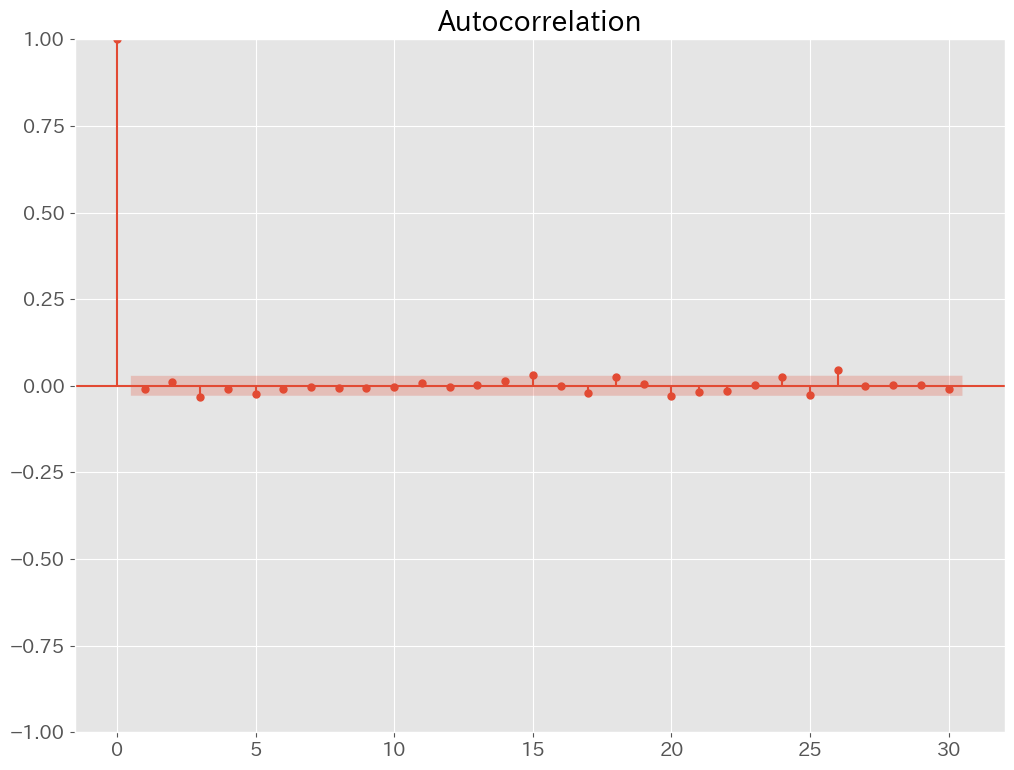

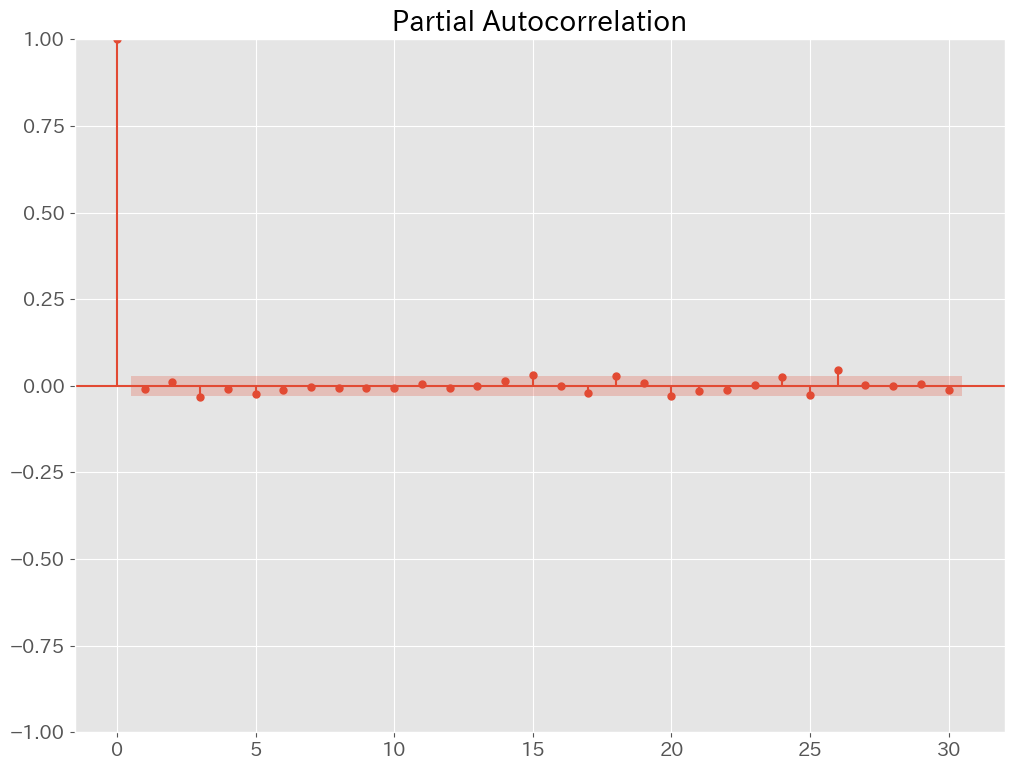

In [45]:
#
#定常系列の自己相関
#

acf = plot_acf(df_changed['TOPIX'], lags=30)   #自己相関
pacf = plot_pacf(df_changed['TOPIX'], lags=30) #偏自己相関

### 変数の選択・順番

In [46]:
df_changed = df_changed.reindex(columns = [ 'S&P500', 'VI', 'Ex', 'JGB','TOPIX',])
df_changed.columns = ['S&P500', 'VI', 'ドル円', '国債金利','TOPIX',]

## 分析モデル

### VARモデル

In [47]:
#
# VARモデルの構築
#

    
# 最大のラグ数
maxlags = 10

# モデルのインスタンス生成
var_model = VAR(df_changed)

#最適なハイパーパラメータ（ラグの次数）の探索
print(var_model.select_order(10).summary())

# 最適なラグの探索
lag = var_model.select_order(maxlags).selected_orders
print('最適なラグ：',lag['bic'],'\n')

# モデルの学習
results_VAR = var_model.fit(lag['bic'])

# 結果出力
print(results_VAR.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -31.18      -31.18   2.861e-14      -31.18
1       -35.17      -35.12   5.344e-16      -35.15
2       -35.20     -35.13*   5.143e-16      -35.18
3       -35.22      -35.11   5.061e-16     -35.18*
4       -35.23      -35.08   5.034e-16      -35.17
5      -35.23*      -35.05  5.033e-16*      -35.16
6       -35.22      -35.01   5.049e-16      -35.15
7       -35.22      -34.97   5.070e-16      -35.13
8       -35.22      -34.94   5.056e-16      -35.12
9       -35.22      -34.90   5.066e-16      -35.11
10      -35.22      -34.87   5.062e-16      -35.10
--------------------------------------------------
最適なラグ： 2 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 08, Jan, 2024
Time:                     17:25:02
-------------------------------------------------

In [48]:
#
# グレンジャー因果性の検定
#   帰無仮説：グレンジャー因果なし
#   対立仮説：グレンジャー因果あり
#

for i in range(len(df_changed.columns)):
    for j in range(len(df_changed.columns)):
        if i != j :
            #因果の検定
            test_c_VAR = results_VAR.test_causality(causing=i, caused=j) 
            #p値
            test_c_VAR.pvalue
            #検定結果の出力
            print(df_changed.columns[i],'->',df_changed.columns[j],'\t',test_c_VAR.pvalue)

S&P500 -> VI 	 1.722961623178617e-182
S&P500 -> ドル円 	 8.81851183296989e-66
S&P500 -> 国債金利 	 8.191855310432435e-21
S&P500 -> TOPIX 	 1.5867997433252602e-278
VI -> S&P500 	 0.25885730010119445
VI -> ドル円 	 0.07652503337727541
VI -> 国債金利 	 2.597498423728594e-05
VI -> TOPIX 	 1.5440640509356387e-06
ドル円 -> S&P500 	 0.028337066127051426
ドル円 -> VI 	 0.5805385748039056
ドル円 -> 国債金利 	 0.38750724169858564
ドル円 -> TOPIX 	 0.0003511680591788263
国債金利 -> S&P500 	 0.6633904759558302
国債金利 -> VI 	 0.06328607664422811
国債金利 -> ドル円 	 0.515683475911329
国債金利 -> TOPIX 	 0.17621692813111492
TOPIX -> S&P500 	 0.6434203715604998
TOPIX -> VI 	 1.1613582325414011e-15
TOPIX -> ドル円 	 2.2929664493306658e-14
TOPIX -> 国債金利 	 0.0409678881588922


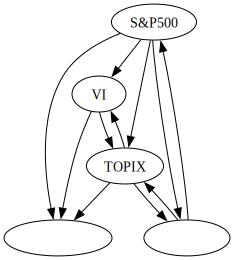

In [49]:
#
# 有向グラフ（VARのみ考慮）
#
    
# インスタンスの生成
graph = Digraph()

# グラフにノードを追加
for i in range(len(df_changed.columns)):
    graph.node(df_changed.columns[i])

# 因果を検定し有意なとき線を引く
for i in range(len(df_changed.columns)):
    for j in range(len(df_changed.columns)):
        if i != j :
            #因果の検定
            test_c_VAR = results_VAR.test_causality(causing=i, caused=j) 
            #p値が0.1未満のとき線を追加
            if test_c_VAR.pvalue < 0.05:
                graph.edge(df_changed.columns[i], df_changed.columns[j])

# 有向グラフを表示
graph

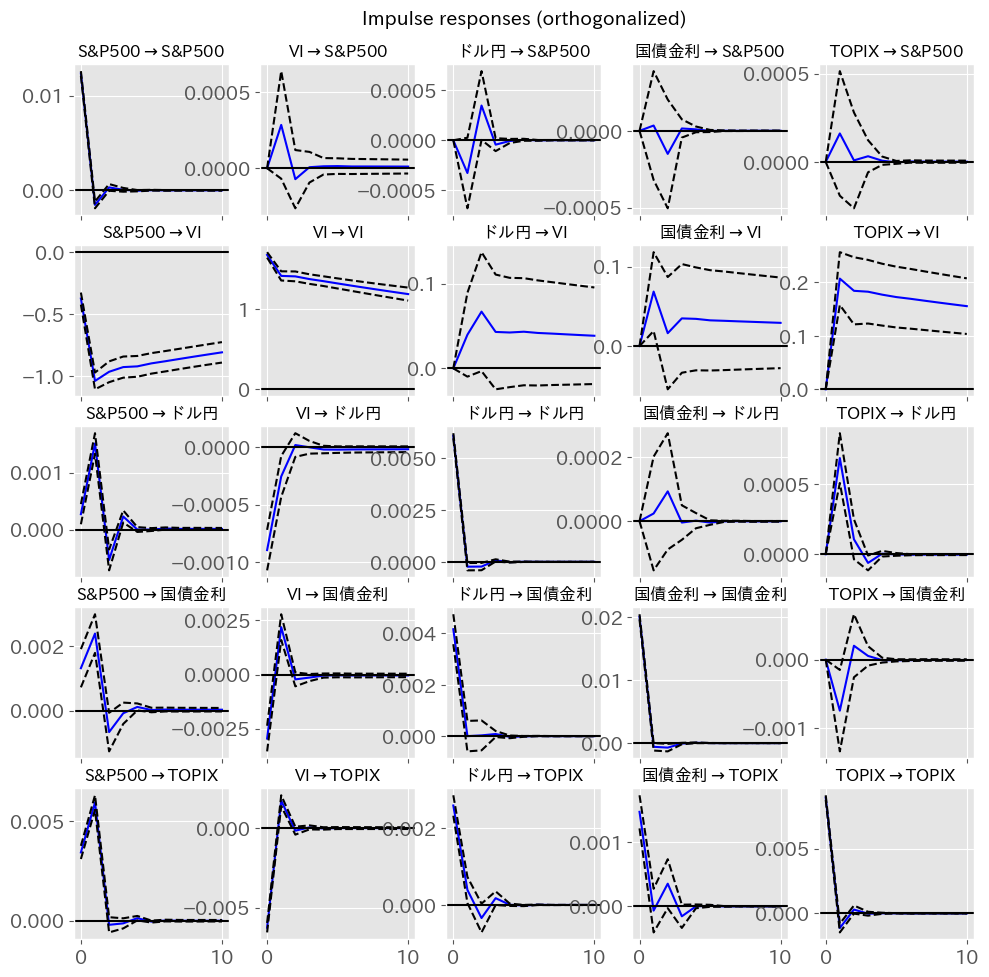

In [50]:
#インパルス応答関数
    
irf = results_VAR.irf()
irf.plot(orth=True)
plt.show()

In [51]:
fevd = results_VAR.fevd(11)
fevd.summary()

FEVD for S&P500
        S&P500        VI       ドル円      国債金利     TOPIX
0     1.000000  0.000000  0.000000  0.000000  0.000000
1     0.998613  0.000522  0.000689  0.000008  0.000168
2     0.997661  0.000555  0.001463  0.000153  0.000168
3     0.997640  0.000555  0.001476  0.000154  0.000175
4     0.997638  0.000556  0.001476  0.000155  0.000175
5     0.997636  0.000557  0.001476  0.000155  0.000175
6     0.997635  0.000558  0.001476  0.000155  0.000175
7     0.997634  0.000559  0.001476  0.000155  0.000175
8     0.997634  0.000560  0.001476  0.000155  0.000175
9     0.997633  0.000561  0.001476  0.000155  0.000175
10    0.997632  0.000561  0.001476  0.000155  0.000175

FEVD for VI
        S&P500        VI       ドル円      国債金利     TOPIX
0     0.047571  0.952429  0.000000  0.000000  0.000000
1     0.200650  0.791303  0.000259  0.000774  0.007014
2     0.238145  0.752178  0.000670  0.000550  0.008458
3     0.254762  0.734779  0.000668  0.000523  0.009268
4     0.265818  0.723318  0.000667  

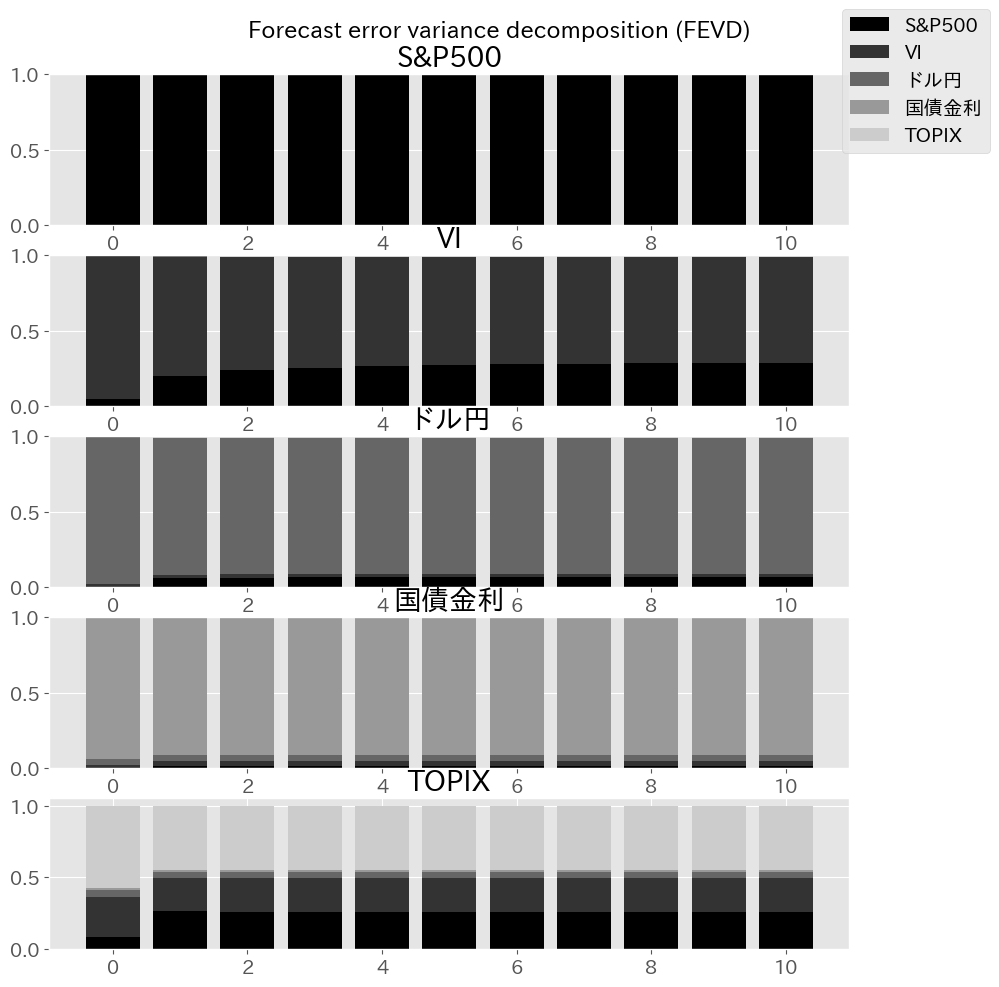

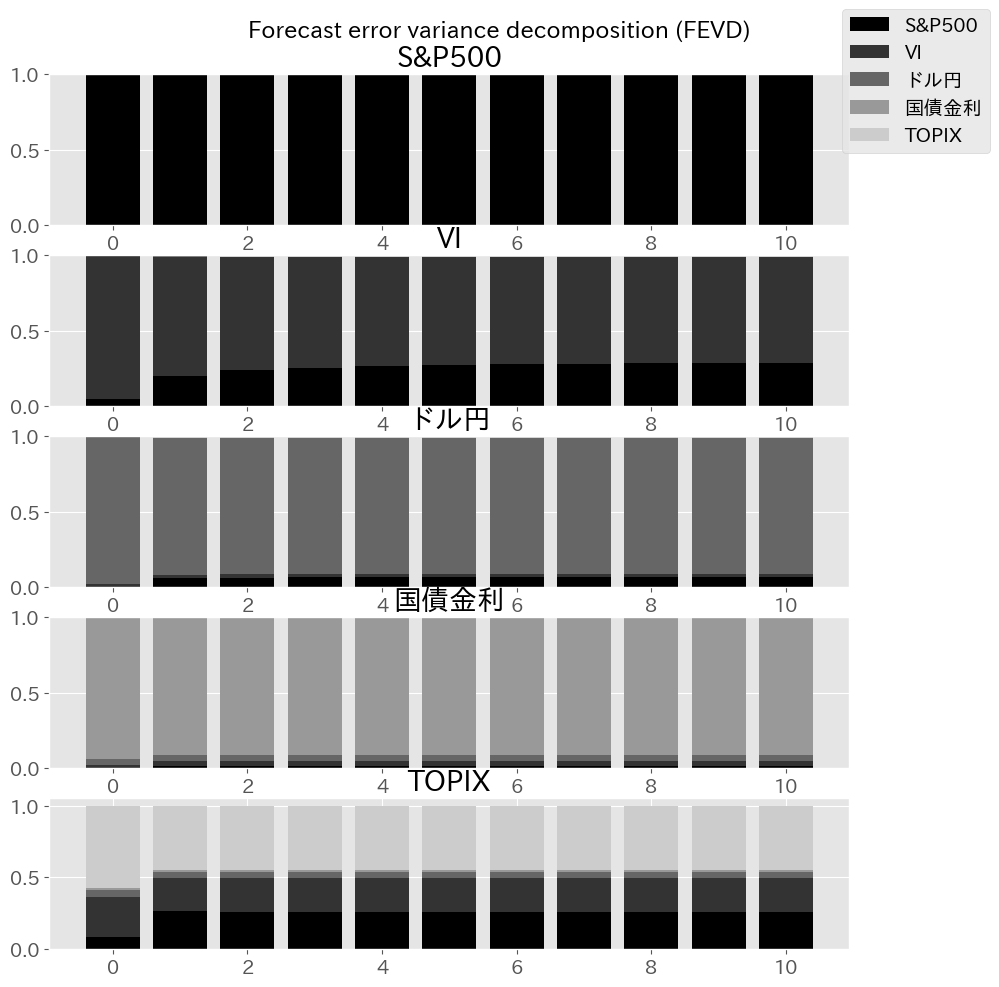

In [52]:
fevd.plot()

In [53]:
df1 = df_changed.loc['2007-01-01':'2010-12-31',:]
df1

,S&P500,VI,ドル円,国債金利,TOPIX
Date,,,,,
2007-01-04,0.000028,16.11,0.002599,0.038,0.010580
2007-01-05,-0.006103,16.53,-0.006131,-0.004,-0.014000
2007-01-09,0.001701,17.29,0.001010,0.020,0.009972
2007-01-10,0.001938,17.75,0.005121,0.020,-0.017359
2007-01-11,0.006320,18.33,0.002008,-0.019,-0.003783
...,...,...,...,...,...
2010-12-22,0.003374,17.43,0.001074,-0.034,-0.000475
2010-12-27,-0.001033,17.05,-0.010312,0.022,-0.001215
2010-12-28,0.000771,17.55,-0.003018,-0.028,-0.002047


In [67]:
#
# VARモデルの構築
#

    
# 最大のラグ数
maxlags = 10

# モデルのインスタンス生成
GFC = VAR(df1)

#最適なハイパーパラメータ（ラグの次数）の探索
#print(var_model.select_order(5).summary())

# 最適なラグの探索
#lag = var_model.select_order(maxlags).selected_orders
print('最適なラグ：',lag['bic'],'\n')

# モデルの学習
results_GFC = GFC.fit(lag['bic'])

# 結果出力
print(results_GFC.summary())

最適なラグ： 2 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 08, Jan, 2024
Time:                     19:43:08
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -32.8082
Nobs:                     943.000    HQIC:                  -32.9833
Log likelihood:           8967.14    FPE:                4.25344e-15
AIC:                     -33.0911    Det(Omega_mle):     4.01381e-15
--------------------------------------------------------------------
Results for equation S&P500
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const             0.000531         0.001453            0.366           0.714
L1.S&P500        -0.125273         0.034662           -3.614           0.000
L1.VI             0.000345         0.000351            0.981    

In [55]:
#
# グレンジャー因果性の検定
#   帰無仮説：グレンジャー因果なし
#   対立仮説：グレンジャー因果あり
#

for i in range(len(df1.columns)):
    for j in range(len(df1.columns)):
        if i != j :
            #因果の検定
            test_c_GFC = results_GFC.test_causality(causing=i, caused=j) 
            #p値
            test_c_GFC.pvalue
            #検定結果の出力
            print(df1.columns[i],'->',df1.columns[j],'\t',test_c_GFC.pvalue)

S&P500 -> VI 	 1.0615481269663322e-74
S&P500 -> ドル円 	 3.058010412040696e-54
S&P500 -> 国債金利 	 7.44565927275832e-14
S&P500 -> TOPIX 	 3.3408300179513413e-84
VI -> S&P500 	 0.5105854586775482
VI -> ドル円 	 0.6477546955434956
VI -> 国債金利 	 0.4491223032975734
VI -> TOPIX 	 0.7932828444887253
ドル円 -> S&P500 	 0.20560831226862003
ドル円 -> VI 	 0.026832012412740195
ドル円 -> 国債金利 	 0.29963307879980483
ドル円 -> TOPIX 	 0.00022366262823163215
国債金利 -> S&P500 	 0.5508625706831443
国債金利 -> VI 	 0.08731289188492664
国債金利 -> ドル円 	 0.14004501593831334
国債金利 -> TOPIX 	 0.05248581184872125
TOPIX -> S&P500 	 0.6359918673210594
TOPIX -> VI 	 1.3033045093806468e-10
TOPIX -> ドル円 	 0.05535558048547368
TOPIX -> 国債金利 	 0.004057778514610148


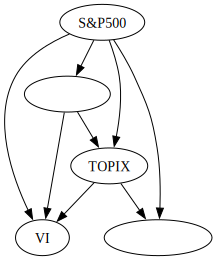

In [56]:
#
# 有向グラフ（VARのみ考慮）
#
    
# インスタンスの生成
graph1 = Digraph()

# グラフにノードを追加
for i in range(len(df1.columns)):
    graph1.node(df1.columns[i])

# 因果を検定し有意なとき線を引く
for i in range(len(df1.columns)):
    for j in range(len(df1.columns)):
        if i != j :
            #因果の検定
            test_c_GFC = results_GFC.test_causality(causing=i, caused=j) 
            #p値が0.1未満のとき線を追加
            if test_c_GFC.pvalue < 0.05:
                graph1.edge(df1.columns[i], df1.columns[j])

# 有向グラフを表示
graph1

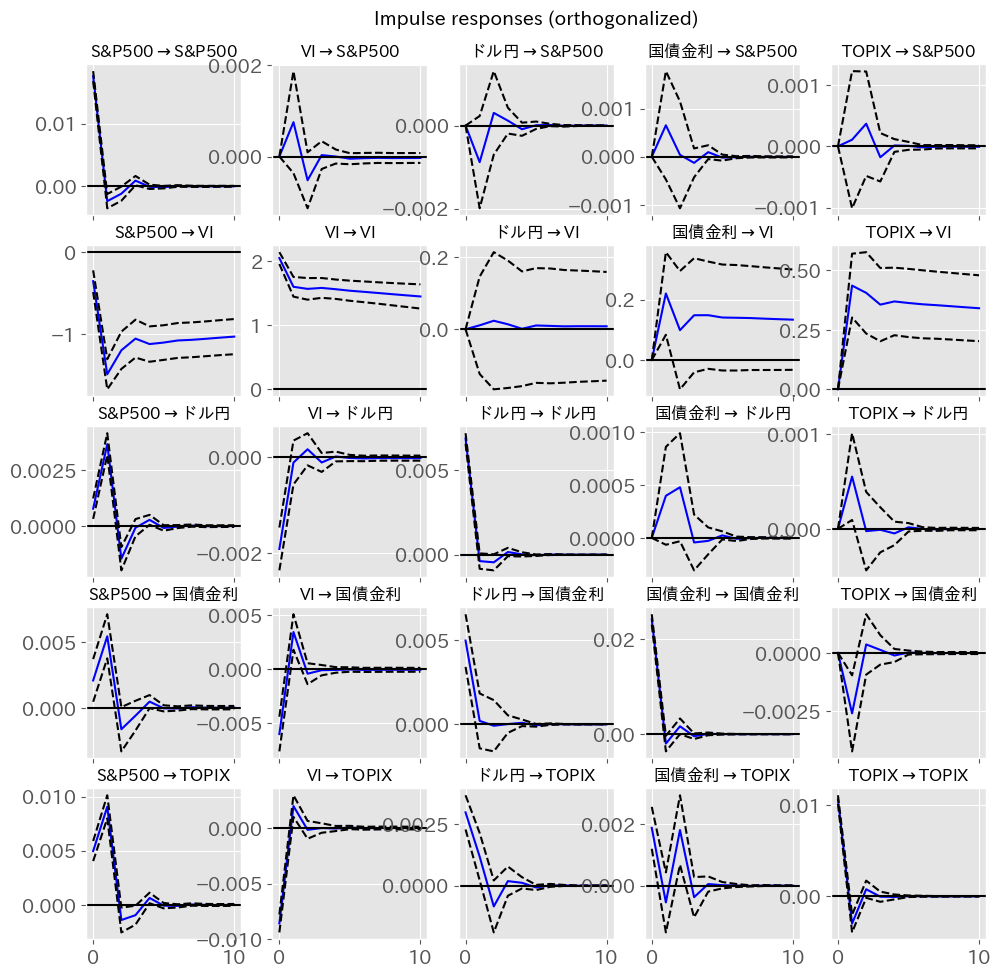

In [57]:
#インパルス応答関数
    
irf_GFC = results_GFC.irf()
irf_GFC.plot(orth=True)
plt.show()

In [58]:
fevd_GFC = results_GFC.fevd(11)
fevd_GFC.summary()

FEVD for S&P500
        S&P500        VI       ドル円      国債金利     TOPIX
0     1.000000  0.000000  0.000000  0.000000  0.000000
1     0.994343  0.001799  0.002467  0.001354  0.000037
2     0.992792  0.002645  0.002747  0.001351  0.000465
3     0.992615  0.002640  0.002783  0.001398  0.000564
4     0.992562  0.002640  0.002808  0.001426  0.000564
5     0.992554  0.002647  0.002808  0.001427  0.000564
6     0.992548  0.002651  0.002808  0.001427  0.000565
7     0.992545  0.002654  0.002808  0.001427  0.000566
8     0.992541  0.002658  0.002808  0.001427  0.000566
9     0.992537  0.002661  0.002808  0.001427  0.000566
10    0.992534  0.002664  0.002808  0.001427  0.000566

FEVD for VI
        S&P500        VI       ドル円      国債金利     TOPIX
0     0.028847  0.971153  0.000000  0.000000  0.000000
1     0.250281  0.724204  0.000013  0.005182  0.020321
2     0.281009  0.688191  0.000051  0.004339  0.026410
3     0.283994  0.683303  0.000051  0.004664  0.027988
4     0.291535  0.674232  0.000042  

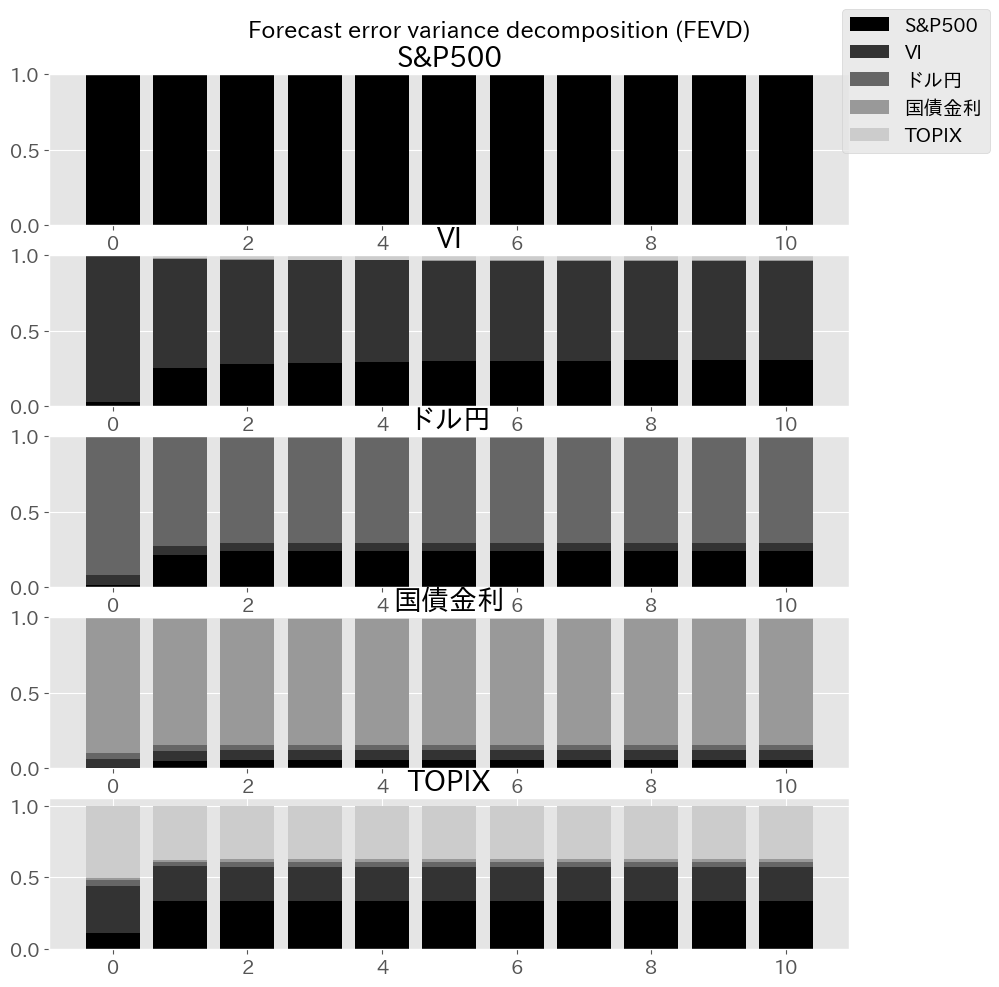

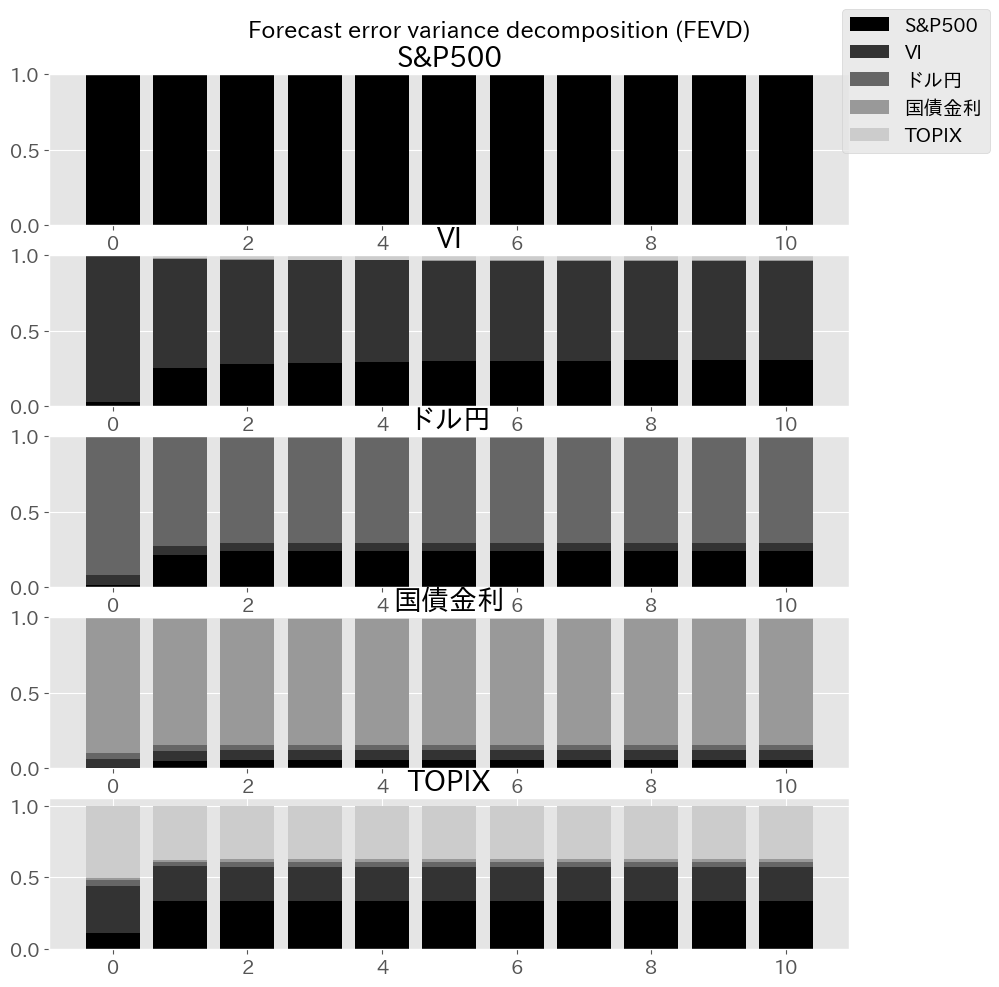

In [59]:
fevd_GFC.plot()

In [60]:
df2 = df_changed.loc['2020-01-01':'2023-05-06',:]
df2

,S&P500,VI,ドル円,国債金利,TOPIX
Date,,,,,
2020-01-06,0.007728,16.87,-0.013139,-0.010,-0.013964
2020-01-07,-0.002807,15.11,0.003048,0.017,0.016105
2020-01-08,0.004890,17.25,-0.005548,-0.005,-0.013805
2020-01-09,0.006633,14.77,0.012897,0.010,0.016121
2020-01-10,-0.002859,14.32,0.002742,0.000,0.003528
...,...,...,...,...,...
2023-04-26,-0.003849,16.82,-0.004476,-0.020,-0.008977
2023-04-27,0.019377,16.42,0.000000,0.000,0.004245
2023-04-28,0.008219,15.22,0.002912,-0.063,0.012210


In [61]:
#
# VARモデルの構築
#

    
# 最大のラグ数
maxlags = 10

# モデルのインスタンス生成
var_COVID = VAR(df2)

#最適なハイパーパラメータ（ラグの次数）の探索
#print(var_model.select_order(5).summary())

# 最適なラグの探索
lag = var_model.select_order(maxlags).selected_orders
print('最適なラグ：',lag['bic'],'\n')

# モデルの学習
results_COVID = var_COVID.fit(lag['bic'])

# 結果出力
print(results_COVID.summary())

最適なラグ： 2 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 08, Jan, 2024
Time:                     17:25:20
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -35.2906
Nobs:                     784.000    HQIC:                  -35.4920
Log likelihood:           8454.94    FPE:                3.39930e-16
AIC:                     -35.6178    Det(Omega_mle):     3.17054e-16
--------------------------------------------------------------------
Results for equation S&P500
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const            -0.002022         0.002067           -0.978           0.328
L1.S&P500        -0.181907         0.039390           -4.618           0.000
L1.VI             0.000557         0.000410            1.359    

In [62]:
#
# グレンジャー因果性の検定
#   帰無仮説：グレンジャー因果なし
#   対立仮説：グレンジャー因果あり
#

for i in range(len(df2.columns)):
    for j in range(len(df2.columns)):
        if i != j :
            #因果の検定
            test_c_COVID = results_COVID.test_causality(causing=i, caused=j) 
            #p値
            test_c_COVID.pvalue
            #検定結果の出力
            print(df2.columns[i],'->',df2.columns[j],'\t',test_c_COVID.pvalue)

S&P500 -> VI 	 9.735025057103176e-19
S&P500 -> ドル円 	 4.288863736285252e-06
S&P500 -> 国債金利 	 0.4085910171151227
S&P500 -> TOPIX 	 5.649006096887055e-40
VI -> S&P500 	 0.23767128242312055
VI -> ドル円 	 0.042791430160768036
VI -> 国債金利 	 0.004613878529548562
VI -> TOPIX 	 0.0004707688760130279
ドル円 -> S&P500 	 0.05844530315054649
ドル円 -> VI 	 0.046495463402447916
ドル円 -> 国債金利 	 0.0020929806233501063
ドル円 -> TOPIX 	 0.0005058965144576057
国債金利 -> S&P500 	 0.0043075499191685285
国債金利 -> VI 	 0.1829351689119624
国債金利 -> ドル円 	 0.6858056359794064
国債金利 -> TOPIX 	 0.38480419358566875
TOPIX -> S&P500 	 0.2898764738037824
TOPIX -> VI 	 0.00030805571342035004
TOPIX -> ドル円 	 0.25363315668722985
TOPIX -> 国債金利 	 0.32372118900707836


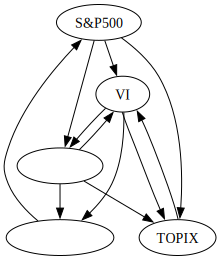

In [63]:
#
# 有向グラフ（VARのみ考慮）
#
    
# インスタンスの生成
graph2 = Digraph()

# グラフにノードを追加
for i in range(len(df2.columns)):
    graph2.node(df2.columns[i])

# 因果を検定し有意なとき線を引く
for i in range(len(df2.columns)):
    for j in range(len(df2.columns)):
        if i != j :
            #因果の検定
            test_c_COVID = results_COVID.test_causality(causing=i, caused=j) 
            #p値が0.1未満のとき線を追加
            if test_c_COVID.pvalue < 0.05:
                graph2.edge(df2.columns[i], df2.columns[j])

# 有向グラフを表示
graph2

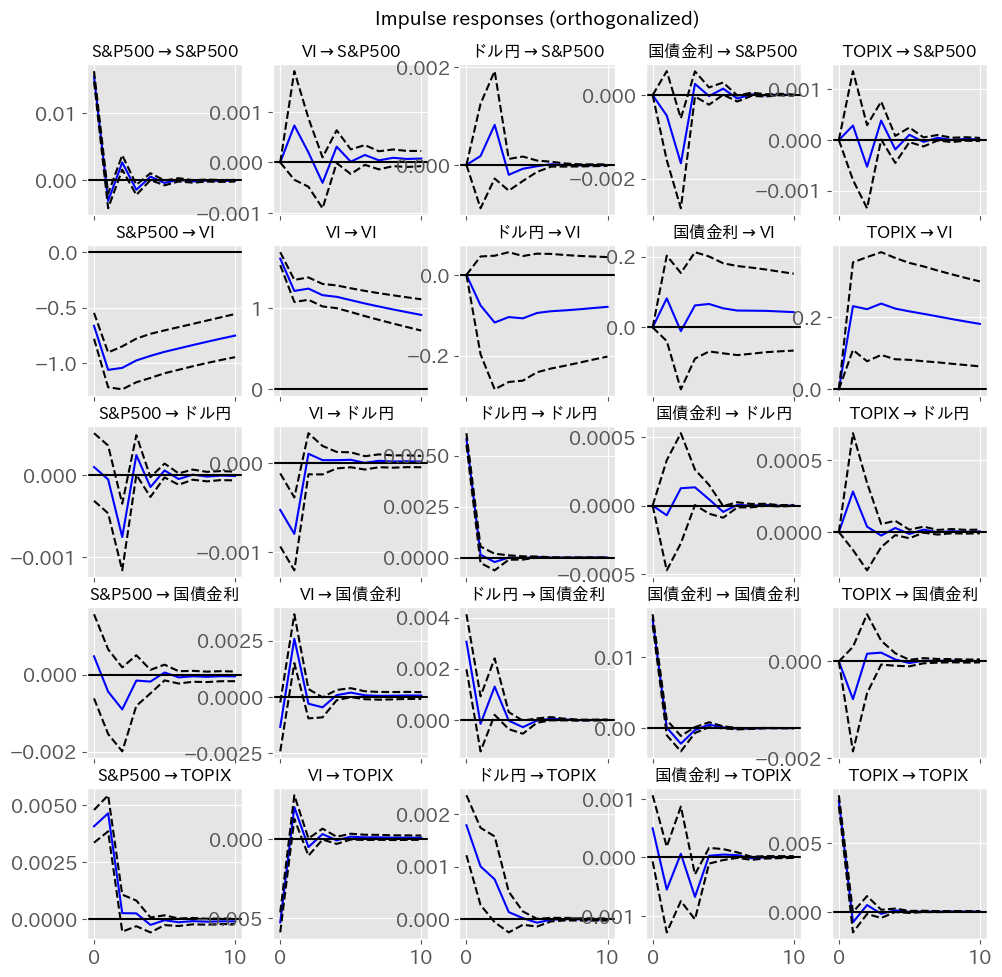

In [64]:
#インパルス応答関数
    
irf_COVID = results_COVID.irf()
irf_COVID.plot(orth=True)
plt.show()

In [65]:
fevd_COVID = results_COVID.fevd(11)
fevd_COVID.summary()

FEVD for S&P500
        S&P500        VI       ドル円      国債金利     TOPIX
0     1.000000  0.000000  0.000000  0.000000  0.000000
1     0.996441  0.002136  0.000131  0.000965  0.000326
2     0.982569  0.002196  0.002699  0.011162  0.001374
3     0.981119  0.002795  0.002830  0.011333  0.001923
4     0.980627  0.003158  0.002849  0.011316  0.002050
5     0.980506  0.003157  0.002850  0.011399  0.002089
6     0.980394  0.003238  0.002851  0.011423  0.002094
7     0.980381  0.003245  0.002850  0.011424  0.002101
8     0.980350  0.003276  0.002851  0.011423  0.002101
9     0.980330  0.003293  0.002851  0.011424  0.002102
10    0.980308  0.003315  0.002851  0.011423  0.002103

FEVD for VI
        S&P500        VI       ドル円      国債金利     TOPIX
0     0.146944  0.853056  0.000000  0.000000  0.000000
1     0.277683  0.710846  0.001004  0.001185  0.009282
2     0.319276  0.665413  0.002345  0.000817  0.012149
3     0.338217  0.643251  0.002844  0.000997  0.014690
4     0.347704  0.631902  0.003247  

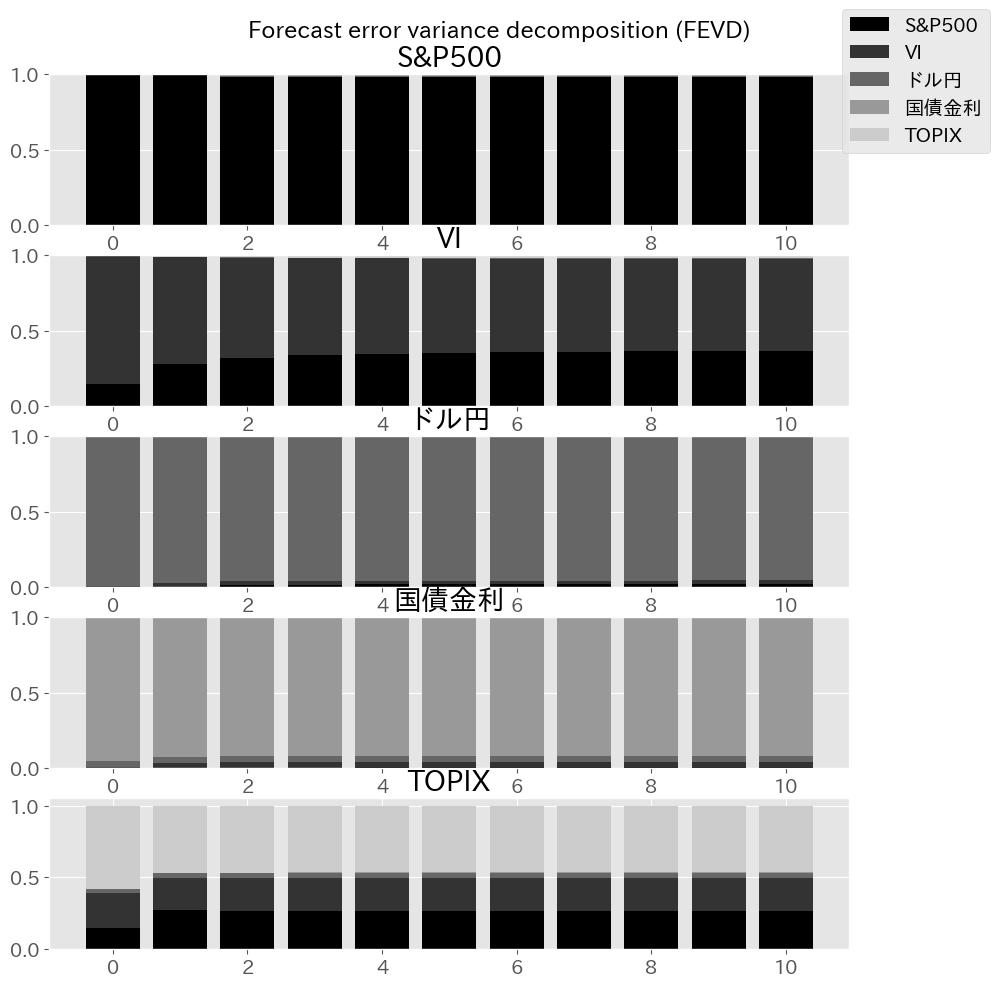

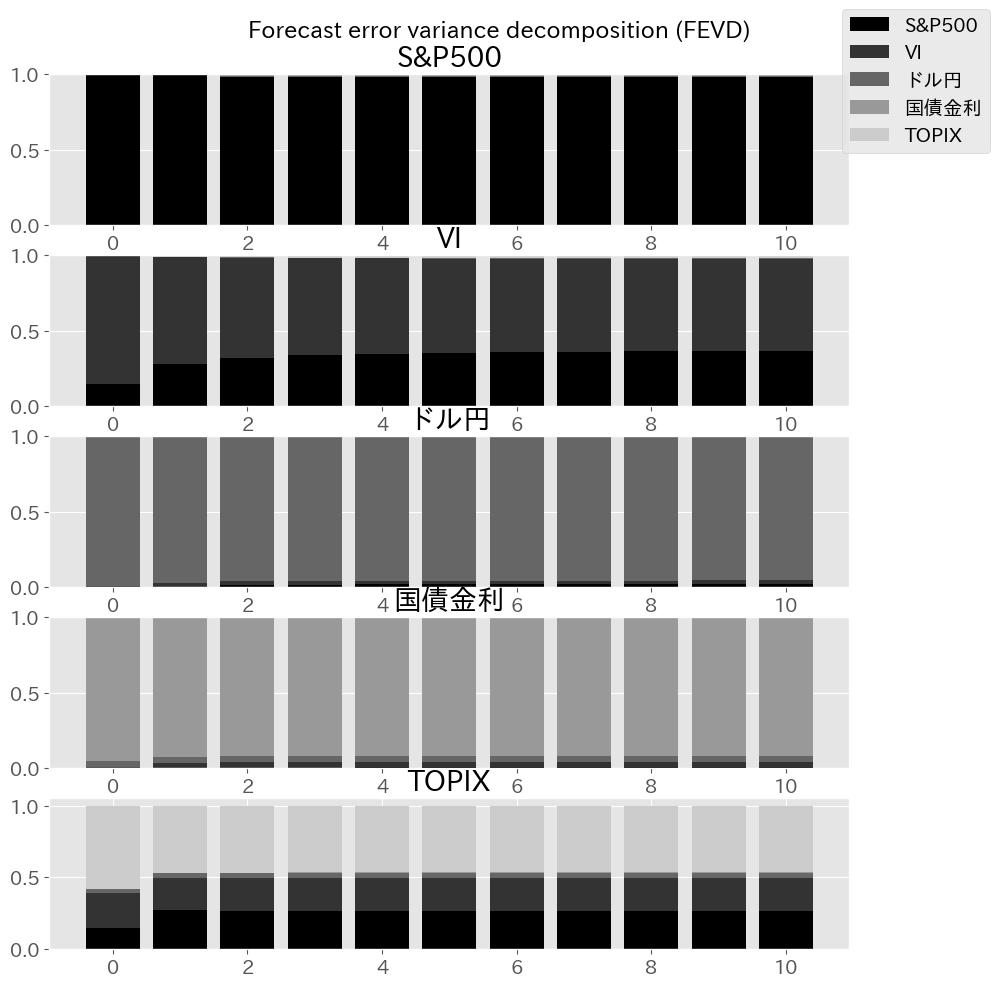

In [66]:
fevd_COVID.plot()